In [215]:
#Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [216]:
# Reading train and test data:

ds1=pd.read_csv('train.csv')
ds2=pd.read_csv('test.csv')
df_train= pd.DataFrame(ds1)
df_test= pd.DataFrame(ds2)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [217]:
#information about the data:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [219]:
# shape of the train dataset:

df_train.shape

(1168, 81)

In [220]:
# datatypes in train dataset:

df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Data Pre-Processing: 

In [221]:
# Filling train dataset with mode as its objective datatype:

df_train['Alley'].fillna(df_train['Alley'].mode()[0],inplace=True)
df_train['MiscFeature'].fillna(df_train['MiscFeature'].mode()[0],inplace=True)
df_train['Fence'].fillna(df_train['Fence'].mode()[0],inplace=True)
df_train['PoolQC'].fillna(df_train['PoolQC'].mode()[0],inplace=True)
df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0],inplace=True)
df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0],inplace=True)
df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0],inplace=True)
df_train['GarageType'].fillna(df_train['GarageType'].mode()[0],inplace=True)
df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0],inplace=True)
df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0],inplace=True)
df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0],inplace=True)
df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0],inplace=True)
df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0],inplace=True)
df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0],inplace=True)
df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0],inplace=True)

In [222]:
# Filling numeric nan value with mean

df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean(),inplace=True)   
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(),inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean(),inplace=True)

In [223]:
# Data Cleaning:

df_train.drop(['Alley','PoolQC','Fence','MiscFeature','Id','GarageYrBlt'],axis=1,inplace=True)

In [224]:
# Replacing 0 value in train and test dataset with mean as the columns are numeric datatype:

# Train dataset:

df_train['BsmtFinSF1']=df_train['BsmtFinSF1'].replace(0,444.7260273972603)
df_train['MasVnrArea']=df_train['MasVnrArea'].replace(0.00000000e+00,102.31007751937983)
df_train['BsmtFinSF2']=df_train['BsmtFinSF2'].replace(0,46.647260273972606)
df_train['BsmtUnfSF']=df_train['BsmtUnfSF'].replace(0,569.7217465753424)
df_train['TotalBsmtSF']=df_train['TotalBsmtSF'].replace(0,1061.0950342465753)
df_train['2ndFlrSF']=df_train['2ndFlrSF'].replace(0,348.826198630137)
df_train['LowQualFinSF']=df_train['LowQualFinSF'].replace(0,6.38013698630137)
df_train['GarageArea']=df_train['GarageArea'].replace(0,476.86044520547944)
df_train['WoodDeckSF']=df_train['WoodDeckSF'].replace(0,96.20633561643835)
df_train['OpenPorchSF']=df_train['OpenPorchSF'].replace(0,46.55993150684932)
df_train['EnclosedPorch']=df_train['EnclosedPorch'].replace(0,23.01541095890411)
df_train['MiscVal']=df_train['MiscVal'].replace(0,47.31506849315068)

# test dataset:

df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].replace(0,439.2945205479452)
df_test['MasVnrArea']=df_test['MasVnrArea'].replace(0.,109.17182130584192)
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].replace(0,46.157534246575345)
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].replace(0,557.3150684931506)
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].replace(0,1042.7671232876712)
df_test['2ndFlrSF']=df_test['2ndFlrSF'].replace(0,339.6575342465753)
df_test['LowQualFinSF']=df_test['LowQualFinSF'].replace(0,3.702054794520548)
df_test['GarageArea']=df_test['GarageArea'].replace(0,457.458904109589)
df_test['WoodDeckSF']=df_test['WoodDeckSF'].replace(0,86.3972602739726)
df_test['OpenPorchSF']=df_test['OpenPorchSF'].replace(0,47.06164383561644)
df_test['EnclosedPorch']=df_test['EnclosedPorch'].replace(0,17.708904109589042)
df_test['MiscVal']=df_test['MiscVal'].replace(0,28.184931506849313)


In [225]:
#checking for unique values in train dataset:

column_name=df_train.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df_train[column].unique()))

MSSubClass: [120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
MSZoning: ['RL' 'RM' 'FV' 'RH' 'C (all)']
LotFrontage: [ 70.9884696  95.         92.        105.         58.         88.
  70.         80.         50.         44.        129.         59.
  55.         64.         24.         68.         71.         74.
  61.         60.        120.         84.        141.         30.
  65.         76.        100.         85.         75.        107.
 122.         82.         62.         73.         79.         77.
  41.         69.         90.         96.         72.         34.
  78.         63.         40.         98.        160.        108.
 128.         51.         81.         99.         66.         37.
 174.         87.         53.        152.         47.         86.
  56.         89.         35.         52.         21.        104.
  57.         83.         46.        101.        112.        149.
  93.         49.         43.        130.         54.         91.
  67.        

LowQualFinSF: [  6.38013699 528.          53.         156.          80.
 390.         234.         144.         572.         360.
 514.         120.         384.         515.         481.
 513.         232.         371.         473.         420.
 392.        ]
GrLivArea: [ 958 2217 2013 1844 1602 1863 1392 1803 1214 1216 1376 1829 1560 1065
 1393 1502  816 1232 1113 1302 1792  768 1078 1050 1200 2259 1416 1856
 1048 1660 1752 1389 2620 1382 2320  969 1370 2158  912  935 1656  928
 1709  985 1800 1122  334 1269 2792  438 1306  930 1795 2207 1923  951
  827  900 1132 1982  925 2224 1316  874 2515 1194 1640 1496  754 1165
  774 1718  803 2076 1494 1498 1285 1734 1426  986 1040 1456 1252 1539
 2263 1099 1593 1968 2020 1144 1053 1665 1652  936 1786 3608 2184  864
 1986 1554 1993 1314 1564 1824 1839 1080 1088 1842 1646  872 1336 1406
 1442 1846 1355 1196  894 1574 1801 1641 2153 1319 2035  882 1478 2290
 2612 4476 1707 1717 1052 1518 1262  964 1728  784 1287 2599 1537 1536
  904 1265 1505  7

In [226]:
# Fill Missing Values in numeric and objective datatype using meand and mode respectively in Test dataset:

df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['GarageYrBlt']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['Electrical']=df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

In [227]:
# Data Cleaning: 

df_test.drop(['Alley','PoolQC','Fence','MiscFeature','Id','GarageYrBlt'],axis=1,inplace=True)

In [228]:
# Checking Unique values of Test Dataset:

column_name =df_test.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df_test[column].unique()))

MSSubClass: [ 20 120  70  60 180  80  30  50 160 190  90  85  45  75  40]
MSZoning: ['RL' 'RM' 'FV' 'C (all)']
LotFrontage: [ 86.          66.42510121  75.          21.          35.
 107.          32.          60.         100.          50.
 110.          70.          44.          71.          52.
  37.          62.          78.          90.          68.
  67.          80.          76.          24.          57.
  30.          34.          55.          79.          63.
  98.          36.          59.          66.          91.
  85.          64.          72.          43.          74.
 102.          56.          83.          77.         120.
  73.          48.          93.          92.          58.
  40.          33.          47.          51.         138.
 124.          42.          89.         105.          65.
  45.          61.         137.          96.         150.
  69.        ]
LotArea: [ 14157   5814  11838  12000  14598   1936   3675  13891  12800   4500
   6324   9503  21750  3513

In [229]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

# EDA:


## Plotting:

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

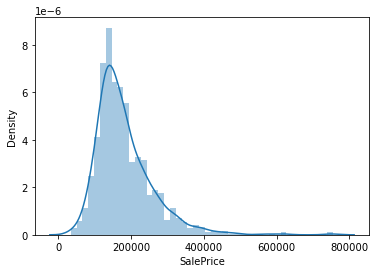

In [230]:
# Target Label plotting:

sns.distplot(df_train['SalePrice'], kde=True)

Data is not equally distributed and has skewness

In [231]:
# removing skewness using logarithm method from target label:

df_train["SalePrice"]=np.log1p(df_train["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

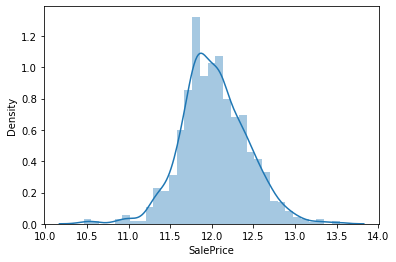

In [232]:
sns.distplot(df_train["SalePrice"])

Data is equally distributed

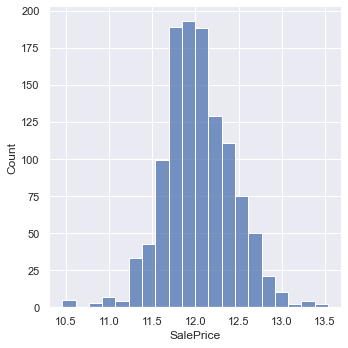

In [285]:
sns.set(rc={'figure.figsize':(15,8)})
sns.displot(df_train['SalePrice'],kde=False,bins=20);

## Numeric data plotting: 

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

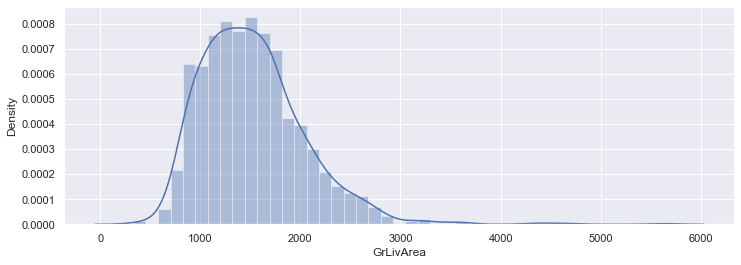

In [267]:
sns.distplot(df_train['GrLivArea'], kde=True)

<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

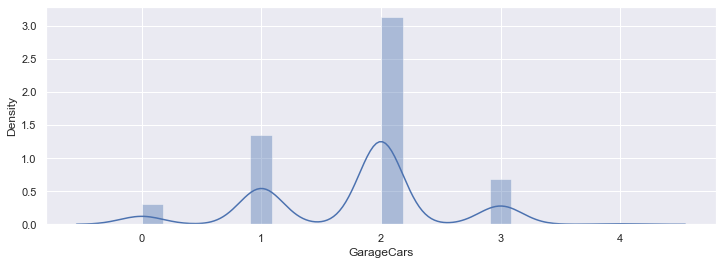

In [268]:
sns.distplot(df_train['GarageCars'], kde=True)

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

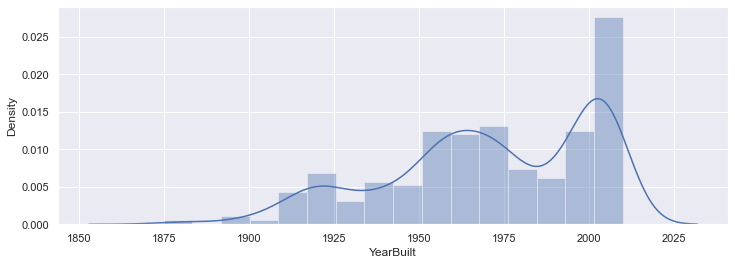

In [269]:
sns.distplot(df_train['YearBuilt'], kde=True)

Maximum house built in 2000.

<AxesSubplot:xlabel='YrSold', ylabel='Density'>

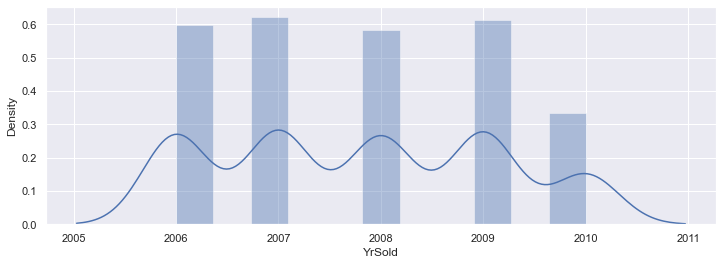

In [270]:
sns.distplot(df_train['YrSold'], kde=True)

Maximum house sold in between 2006 to 2009

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

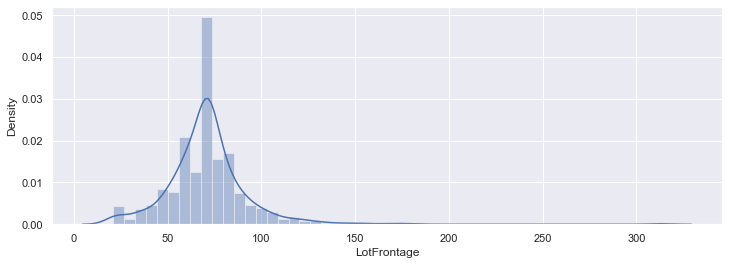

In [257]:
sns.distplot(df_train['LotFrontage'], kde=True)

Equally distributed data

<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

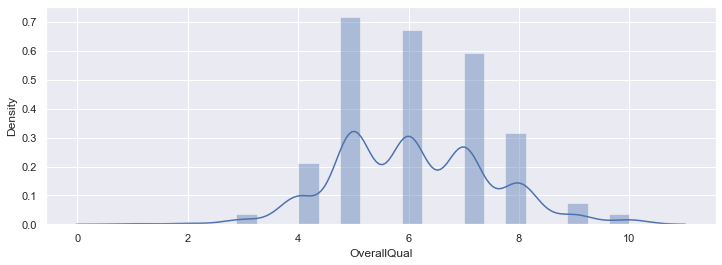

In [258]:
sns.distplot(df_train['OverallQual'], kde=True)

## Categorical data plotting: 

<AxesSubplot:xlabel='SaleType', ylabel='count'>

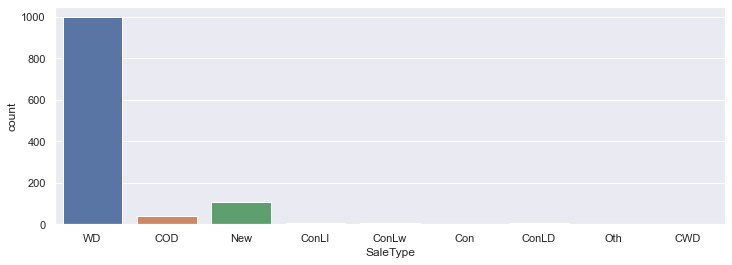

In [259]:
sns.countplot(df_train['SaleType'])

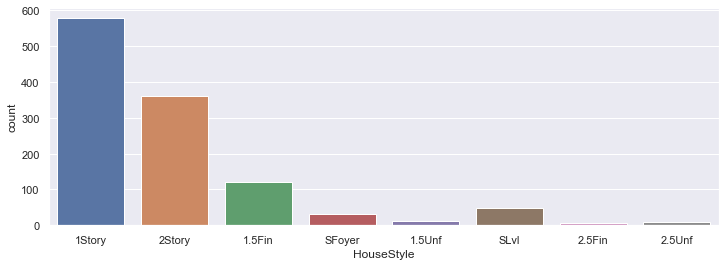

In [264]:
ax=sns.countplot(x='HouseStyle', data=df_train)

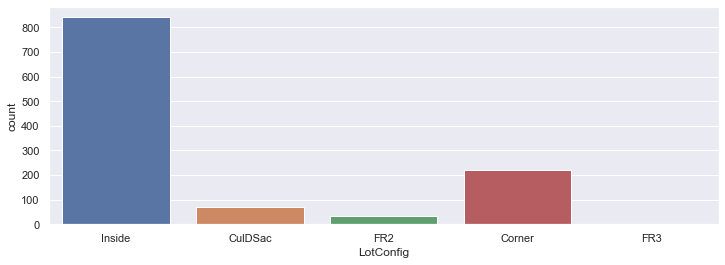

In [265]:
ax=sns.countplot(x='LotConfig', data=df_train)

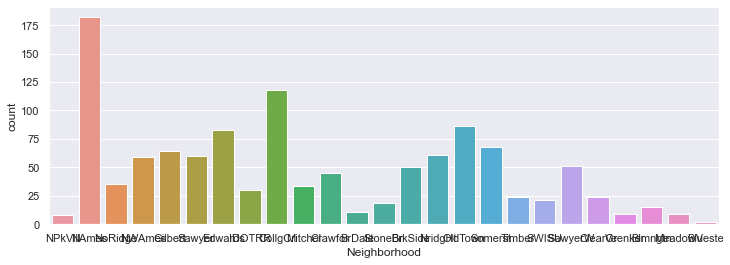

In [266]:
ax=sns.countplot(x='Neighborhood', data=df_train)

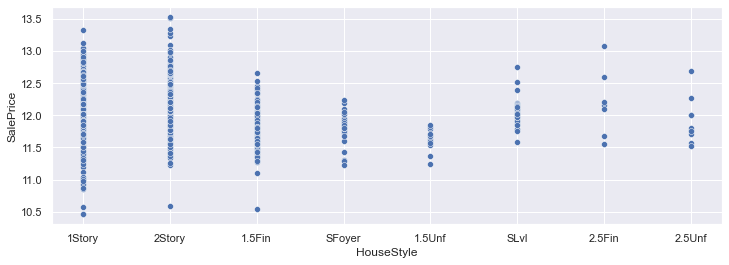

In [272]:
ax=sns.scatterplot(x="HouseStyle", y="SalePrice", data=df_train)

1 story and 2 story houses are priced high

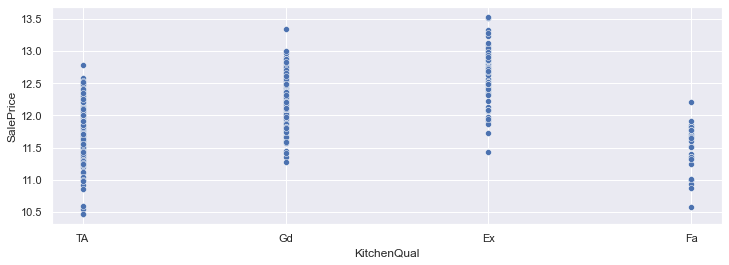

In [273]:
ax=sns.scatterplot(x="KitchenQual", y="SalePrice", data=df_train)

Kitchen quality with good and excellent condition are priced high

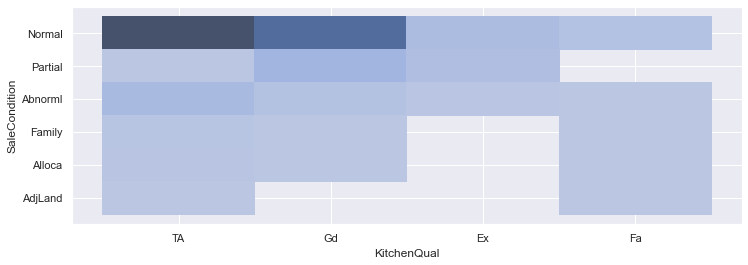

In [276]:
ax=sns.histplot(x="KitchenQual", y="SaleCondition", data=df_train)

kitchen qual with TA have normal sale condition

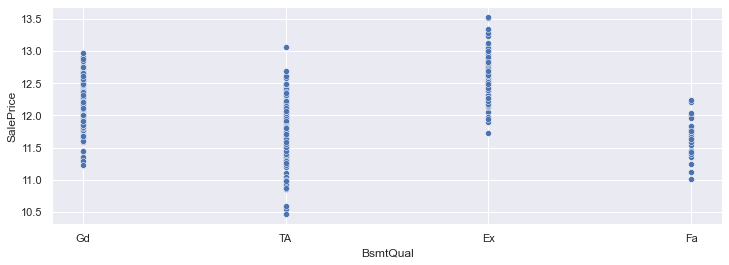

In [278]:
ax=sns.scatterplot(x="BsmtQual", y="SalePrice", data=df_train)

Basement quality with excellent review are marked higher 

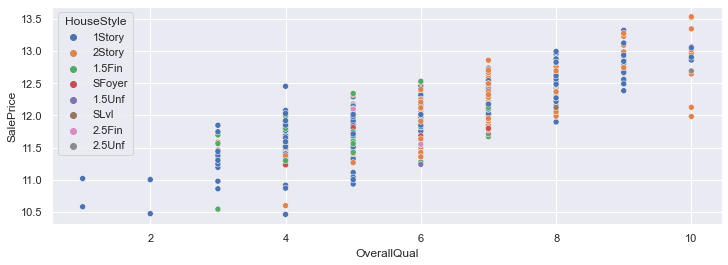

In [279]:
ax=sns.scatterplot(x="OverallQual", y="SalePrice",hue='HouseStyle', data=df_train)

overallquality having range between 8 and 10 have higher price of 1 and 2 story house style.

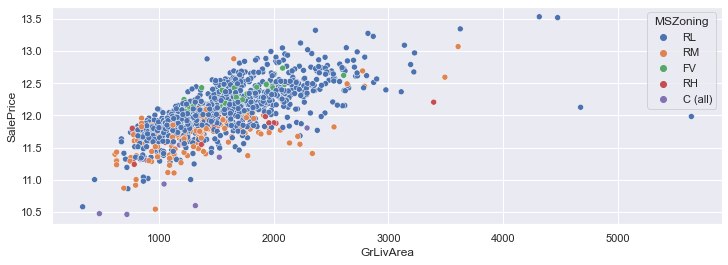

In [280]:
ax=sns.scatterplot(x="GrLivArea", y="SalePrice",hue='MSZoning', data=df_train)

GrLivArea is increasing and is maximum in range between 1000 to 3000 and the house price is high for rl mszoning

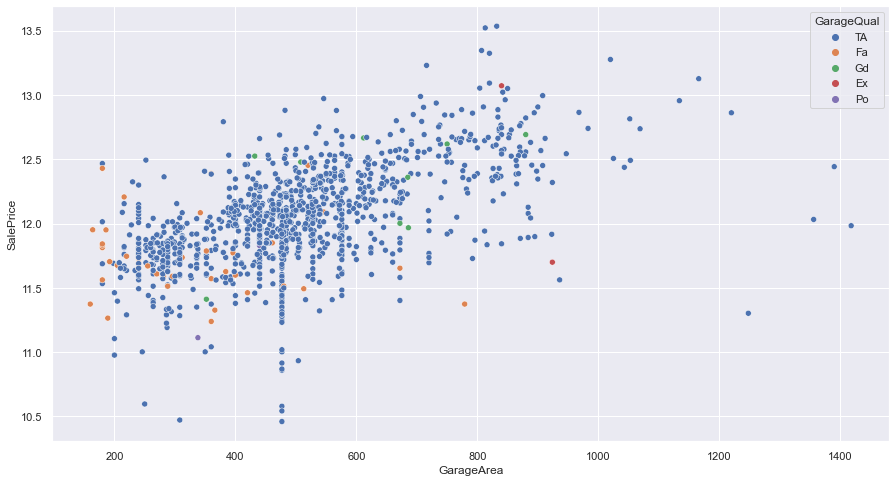

In [286]:
ax=sns.scatterplot(x="GarageArea", y="SalePrice",hue='GarageQual', data=df_train)

maximum house has garage area between 200 to 800 and the garage quality is TA 

## Correlation:

In [243]:
#Printing Numeric columns:

numeric_features=df_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [244]:
# Printing Categorical columns:

cate_features=df_train.select_dtypes(include=[np.object])
cate_features.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [245]:
# finding correlation of numeric data with SalePrice

correlation=numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False),'\n')

SalePrice        1.000000
OverallQual      0.818551
GrLivArea        0.697365
GarageCars       0.671597
FullBath         0.593204
1stFlrSF         0.577723
YearBuilt        0.575768
YearRemodAdd     0.570256
GarageArea       0.566071
TotalBsmtSF      0.563063
TotRmsAbvGrd     0.531997
Fireplaces       0.481745
2ndFlrSF         0.400728
MasVnrArea       0.374648
BsmtFinSF1       0.357802
LotFrontage      0.320448
HalfBath         0.319324
WoodDeckSF       0.280297
LotArea          0.250576
BsmtFullBath     0.226391
OpenPorchSF      0.214114
BedroomAbvGr     0.199969
BsmtUnfSF        0.164226
ScreenPorch      0.112007
MoSold           0.087390
PoolArea         0.077667
3SsnPorch        0.069436
BsmtFinSF2       0.017549
BsmtHalfBath    -0.003475
MiscVal         -0.004920
OverallCond     -0.018423
MSSubClass      -0.045983
YrSold          -0.048638
LowQualFinSF    -0.050304
EnclosedPorch   -0.120575
KitchenAbvGr    -0.141049
Name: SalePrice, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric features of Sale Price'}>

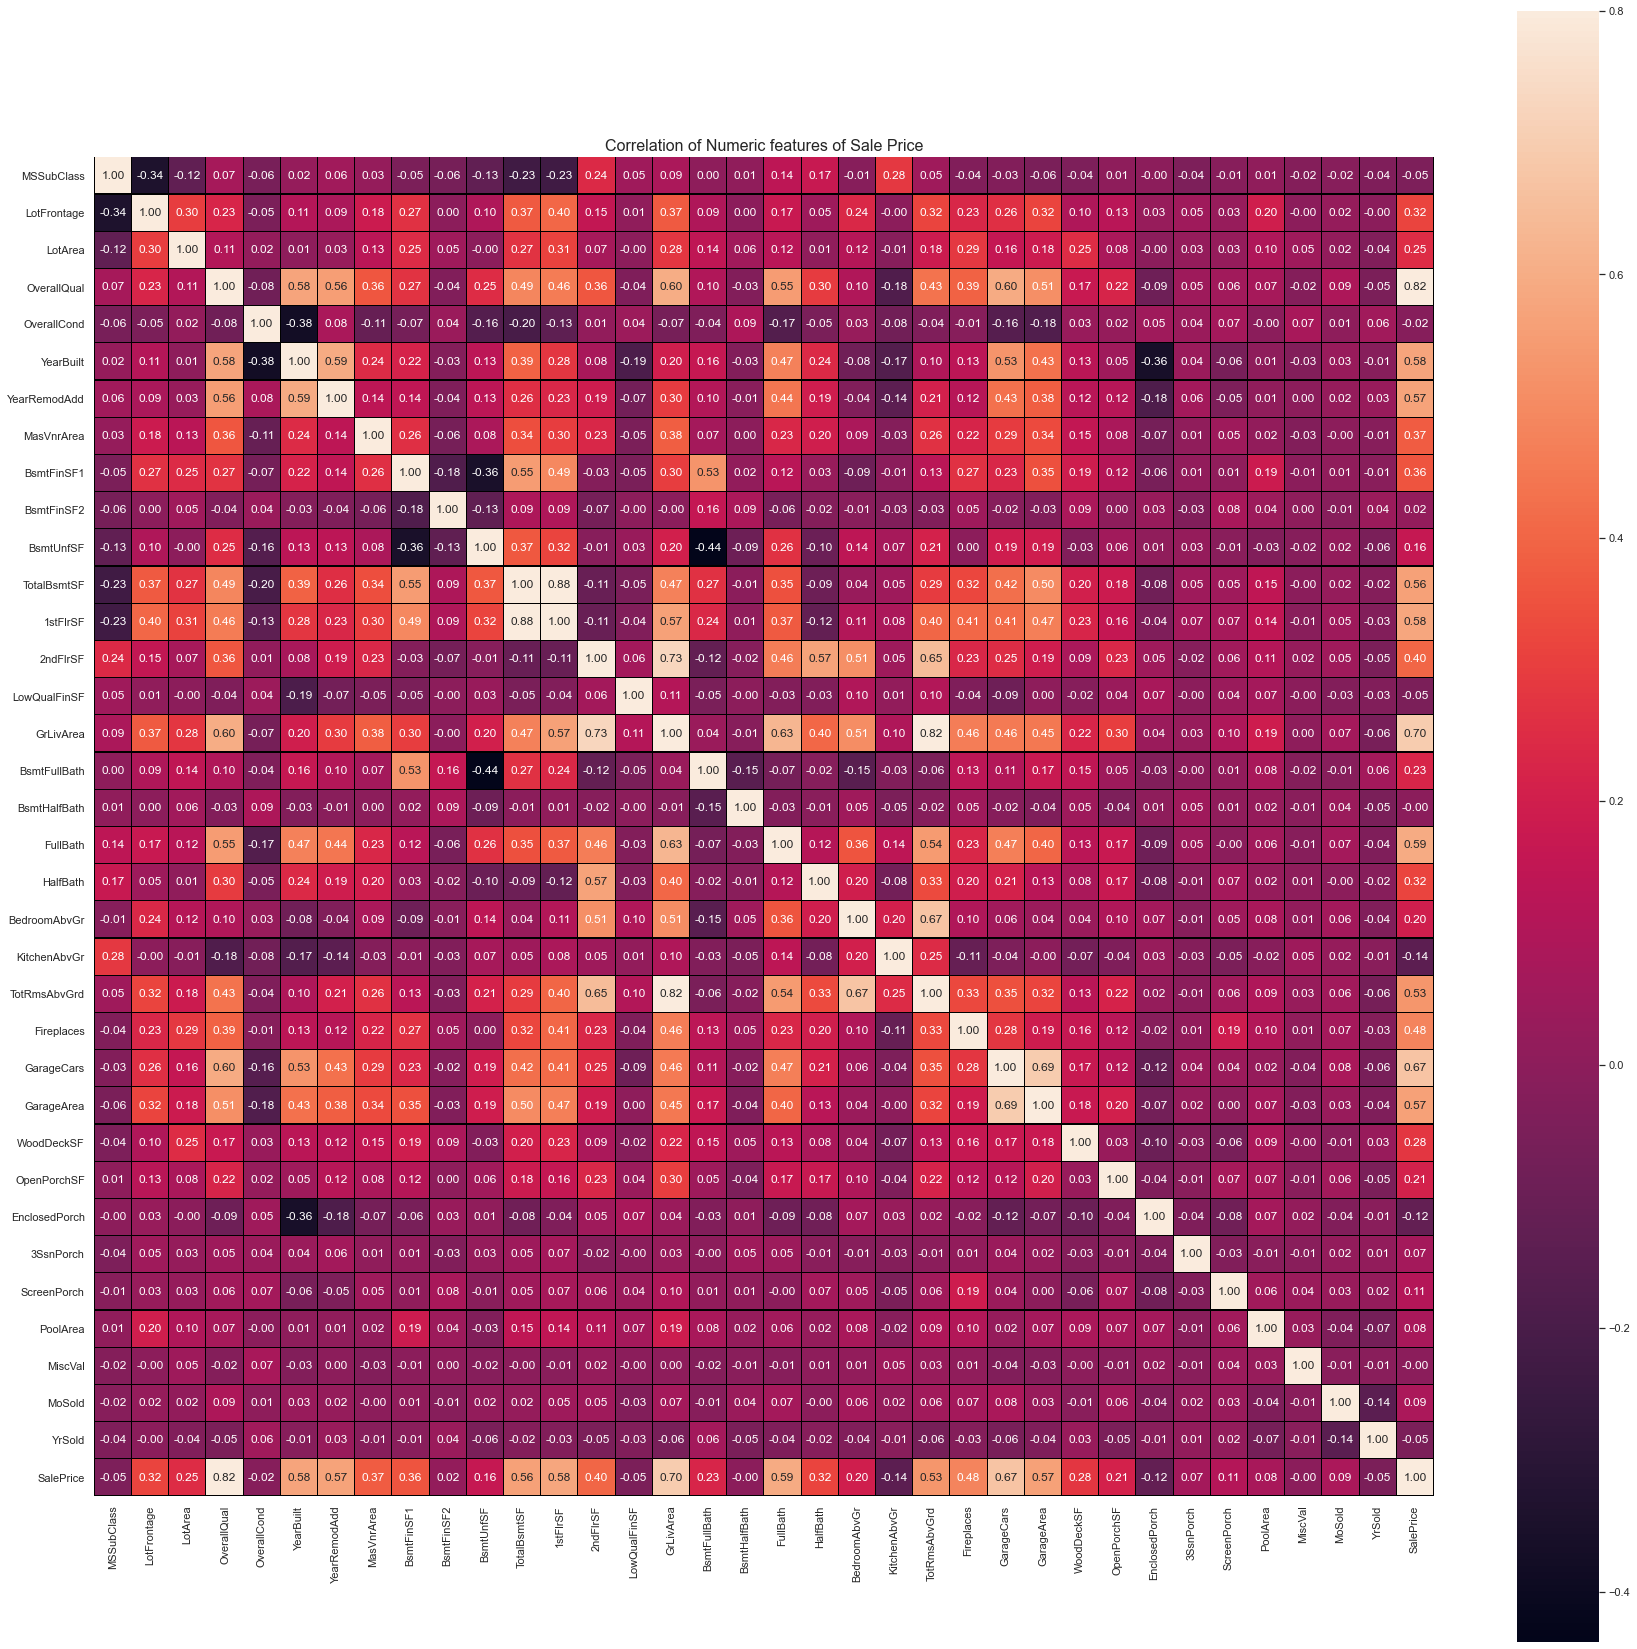

In [250]:
# heatmap representation of correlation:

f, ax=plt.subplots(figsize=(30,30))
plt.title('Correlation of Numeric features of Sale Price',y=1,size=16)
sns.heatmap(correlation,square=True, vmax=0.8,annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [287]:
# concatening train and test data as features in train and test are not same in few columns.

final_df=pd.concat([df_train,df_test],axis=0)

In [288]:
# using one hot encoder in categorical columns:

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [289]:
# categorical columns in dataset:

columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [290]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [291]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,TA,Gd,Po,TA,Gd,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,GasA,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,120,70.98847,4928,6,5,1976,1976,102.310078,120.0,46.64726,958.0,1078.0,958,348.826199,6.380137,958,0,0,2,0,2,1,5,1,2,440.0,96.206336,205.000000,23.015411,0,0,0,47.315068,2,2007,11.759793,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,20,95.00000,15865,8,6,1970,1970,102.310078,351.0,823.00000,1043.0,2217.0,2217,348.826199,6.380137,2217,1,0,2,0,4,1,8,1,2,621.0,81.000000,207.000000,23.015411,0,224,0,47.315068,10,2007,12.498746,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,60,92.00000,9920,7,5,1996,1997,102.310078,862.0,46.64726,255.0,1117.0,1127,886.000000,6.380137,2013,1,0,2,1,3,1,8,1,2,455.0,180.000000,130.000000,23.015411,0,0,0,47.315068,6,2007,12.505403,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
3,20,105.00000,11751,6,6,1977,1977,480.000000,705.0,46.64726,1139.0,1844.0,1844,348.826199,6.380137,1844,0,0,2,0,3,1,7,1,2,546.0,96.206336,122.000000,23.015411,0,0,0,47.315068,1,2010,12.154785,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
4,20,70.98847,16635,6,7,1977,2000,126.000000,1246.0,46.64726,356.0,1602.0,1602,348.826199,6.380137,1602,0,1,2,0,3,1,8,1,2,529.0,24

In [291]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,TA,Gd,Po,TA,Gd,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,GasA,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,120,70.98847,4928,6,5,1976,1976,102.310078,120.0,46.64726,958.0,1078.0,958,348.826199,6.380137,958,0,0,2,0,2,1,5,1,2,440.0,96.206336,205.000000,23.015411,0,0,0,47.315068,2,2007,11.759793,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,20,95.00000,15865,8,6,1970,1970,102.310078,351.0,823.00000,1043.0,2217.0,2217,348.826199,6.380137,2217,1,0,2,0,4,1,8,1,2,621.0,81.000000,207.000000,23.015411,0,224,0,47.315068,10,2007,12.498746,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,60,92.00000,9920,7,5,1996,1997,102.310078,862.0,46.64726,255.0,1117.0,1127,886.000000,6.380137,2013,1,0,2,1,3,1,8,1,2,455.0,180.000000,130.000000,23.015411,0,0,0,47.315068,6,2007,12.505403,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
3,20,105.00000,11751,6,6,1977,1977,480.000000,705.0,46.64726,1139.0,1844.0,1844,348.826199,6.380137,1844,0,0,2,0,3,1,7,1,2,546.0,96.206336,122.000000,23.015411,0,0,0,47.315068,1,2010,12.154785,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
4,20,70.98847,16635,6,7,1977,2000,126.000000,1246.0,46.64726,356.0,1602.0,1602,348.826199,6.380137,1602,0,1,2,0,3,1,8,1,2,529.0,24

In [292]:
# removing duplicate data

final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [293]:
final_df.shape

(1460, 176)

In [294]:
final_df.info

<bound method DataFrame.info of      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           120    70.988470     4928            6            5       1976   
1            20    95.000000    15865            8            6       1970   
2            60    92.000000     9920            7            5       1996   
3            20   105.000000    11751            6            6       1977   
4            20    70.988470    16635            6            7       1977   
..          ...          ...      ...          ...          ...        ...   
287          20    78.000000    10206            8            5       2007   
288          20    57.000000     9245            5            5       1994   
289          20    66.425101    11241            6            7       1970   
290          50    50.000000     5000            6            7       1947   
291         160    21.000000     1953            6            5       1973   

     YearRemodAdd  MasVnrArea  

In [295]:
# describing the dataset:

final_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,RRNe,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.075796,10516.828082,6.099315,5.575342,1971.267808,1984.865753,164.855038,585.548874,87.773349,613.107963,1084.232343,1162.626712,544.016384,11.580925,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,499.210185,143.328896,67.623308,40.771060,3.409589,15.060959,2.758904,85.423916,6.321918,2007.815753,12.028299,0.044521,0.010959,0.788356,0.149315,0.995890,0.028082,0.006849,0.633562,0.034247,0.024658,0.897945,0.000685,0.064384,0.032192,0.002740,0.720548,0.044521,0.008904,0.001370,0.010959,0.039726,0.019178,0.102740,0.034932,0.068493,0.054110,0.025342,0.011644,0.033562,0.154110,0.006164,0

Key Observations:

    1. Mean and Median: Values of mean is greater than median so skewness is present.
    2. 75% percentile and max have differences so columns have outliers.
    3. Standard deviation is less than mean so high peak data.

MSSubClass       AxesSubplot(0.125,0.837584;0.0435393x0.0424157)
LotFrontage    AxesSubplot(0.177247,0.837584;0.0435393x0.0424...
LotArea        AxesSubplot(0.229494,0.837584;0.0435393x0.0424...
OverallQual    AxesSubplot(0.281742,0.837584;0.0435393x0.0424...
OverallCond    AxesSubplot(0.333989,0.837584;0.0435393x0.0424...
                                     ...                        
BuiltIn        AxesSubplot(0.438483,0.277697;0.0435393x0.0424...
CarPort        AxesSubplot(0.49073,0.277697;0.0435393x0.0424157)
Detchd         AxesSubplot(0.542978,0.277697;0.0435393x0.0424...
RFn            AxesSubplot(0.595225,0.277697;0.0435393x0.0424...
P              AxesSubplot(0.647472,0.277697;0.0435393x0.0424...
Length: 176, dtype: object

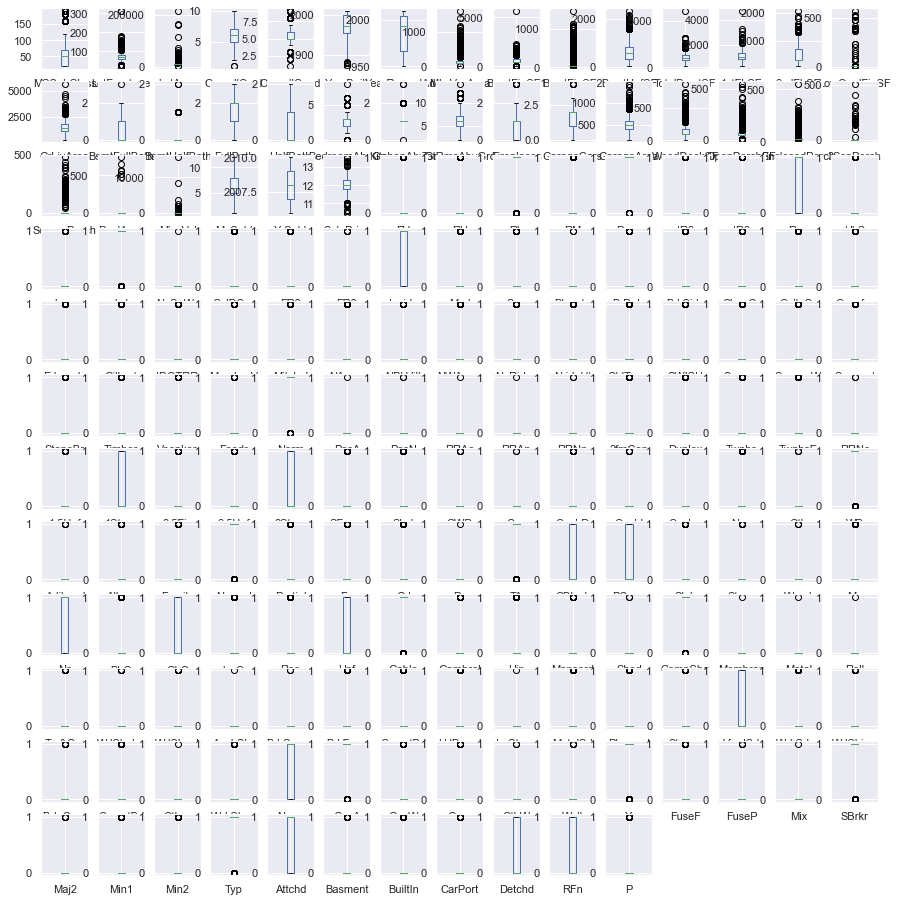

In [299]:
# Detecting Outliers:

#Outliers:

final_df.plot(kind='box',subplots=True,layout=(15,15),figsize=(15,20))

MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF,TotalBsmtSF,1stFlrSF, 2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd,GarageArea,WoodDeckSF,WoodDeckSF, OpenPorchSF, EnclosedPorch,3SsnPorch,ScreenPorch  have outliers

In [158]:
#IQR Method for removing outliers:

def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.01,0.99]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

final_df1=cap_data(final_df)

capping the  MSSubClass
capping the  LotFrontage
capping the  LotArea
capping the  OverallQual
capping the  OverallCond
capping the  YearBuilt
capping the  YearRemodAdd
capping the  MasVnrArea
capping the  BsmtFinSF1
capping the  BsmtFinSF2
capping the  BsmtUnfSF
capping the  TotalBsmtSF
capping the  1stFlrSF
capping the  2ndFlrSF
capping the  LowQualFinSF
capping the  GrLivArea
capping the  BsmtFullBath
capping the  BsmtHalfBath
capping the  FullBath
capping the  HalfBath
capping the  BedroomAbvGr
capping the  KitchenAbvGr
capping the  TotRmsAbvGrd
capping the  Fireplaces
capping the  GarageCars
capping the  GarageArea
capping the  WoodDeckSF
capping the  OpenPorchSF
capping the  EnclosedPorch
capping the  3SsnPorch
capping the  ScreenPorch
capping the  PoolArea
capping the  MiscVal
capping the  MoSold
capping the  YrSold
capping the  SalePrice
capping the  FV
capping the  RH
capping the  RL
capping the  RM
capping the  Pave
capping the  IR2
capping the  IR3
capping the  Reg
capping t

In [159]:
#separating train and test data:

df_Train=final_df1.iloc[:1168,:]
df_Test=final_df1.iloc[1168:,:]

In [ ]:
# correlating target label with the feature columns: 
df_Train.corr

In [ ]:
# Heatmap of Correlation

plt.figure(figsize=(50,50))
sns.heatmap(df_Train.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

In [ ]:
# separating x and y from train data:

x = df_Train.drop("SalePrice",axis=1)
y = df_Train["SalePrice"]

In [161]:
# Importing library: Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [162]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [118]:
vif_calc()

     VIF Factor     features
0     80.116682   MSSubClass
1     35.114332  LotFrontage
2     16.573646      LotArea
3    106.933168  OverallQual
4     65.824404  OverallCond
..          ...          ...
170   19.724298      BuiltIn
171    3.295179      CarPort
172   80.522202       Detchd
173    2.180862          RFn
174    1.294082            P

[175 rows x 2 columns]


In [166]:
# printing values in x 

x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,RRNe,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,120,70.98847,4928.0,6,5,1976.0,1976,102.310078,120.000000,46.64726,958.000000,1078.000000,958.0,348.826199,6.380137,958.0,0,0,2,0,2,1,5,1,2,440.0,96.206336,205.000000,23.015411,0,0.0,0,47.315068,2,2007,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,20,95.00000,15865.0,8,6,1970.0,1970,102.310078,351.000000,823.00000,1043.000000,2155.050000,2217.0,348.826199,6.380137,2217.0,1,0,2,0,4,1,8,1,2,621.0,81.000000,207.000000,23.015411,0,224.0,0,47.315068,10,2007,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,60,92.00000,9920.0,7,5,1996.0,1997,102.310078,862.000000,46.64726,255.000000,1117.000000,1127.0,886.000000,6.380137,2013.0,1,0,2,1,3,1,8,1,2,455.0,180.000000,130.000000,23.015411,0,0.0,0,47.315068,6,2007,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
3,20,105.00000,11751.0,6,6,1977.0,1977,480.000000,705.000000,46.64726,1139.000000,1844.000000,1844.0,348.826199,6.380137,1844.0,0,0,2,0,3,1,7,1,2,546.0,96.206336,122.000000,23.015411,0,0.0,0,47.315068,1,2010,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,20,70.98847,16635.0,6,7,1977.0,2000,126.000000,1246.000000,46.64726,356.000000,1602.000000,1602.0,348.826199,6.380137,1602.0,0,1,2,0,3,1,8,1,2,529.0,240.000000,46.559932,23.015411,0,0.0,0,47.315068,6,2009,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [167]:
# Using power_transform to remove skewness.

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [168]:
# converting ndarray to dataframe
x=pd.DataFrame(x)

In [179]:
# dropping the columns with high skewness

x.drop([171,31,32,40,41],axis=1,inplace=True)

In [180]:
# Scaling the feature data:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
print('x',x)

x [[ 1.37043472  0.05774693 -1.2623748  ... -0.60636746  1.56378634
  -0.1417298 ]
 [-1.16799937  1.24268063  1.22232913 ... -0.60636746 -0.63947355
  -0.1417298 ]
 [ 0.4900471   1.09877965  0.12837489 ... -0.60636746 -0.63947355
  -0.1417298 ]
 ...
 [ 1.70079775 -2.60704359 -2.5163618  ... -0.60636746 -0.63947355
  -0.1417298 ]
 [ 0.69655685 -1.05641615 -0.20196073 ...  1.64916501 -0.63947355
  -0.1417298 ]
 [ 0.4900471   0.05774693 -0.36384207 ... -0.60636746 -0.63947355
  -0.1417298 ]]


In [181]:
# Model selection:

from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [182]:
for i in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    print(f"At random state {i},the training accuracy is:- {r2_score(train_y,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(test_y,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9445527542804967
At random state 0,the testing accuracy is:- -2.5325419060685943e+19


At random state 1,the training accuracy is:- 0.9468591903753034
At random state 1,the testing accuracy is:- -1.4701886264617162e+22


At random state 2,the training accuracy is:- 0.9490937593737706
At random state 2,the testing accuracy is:- -1.0799553143190434e+22


At random state 3,the training accuracy is:- 0.9466586928399804
At random state 3,the testing accuracy is:- -1.6963121913273943e+25


At random state 4,the training accuracy is:- 0.9434243473728191
At random state 4,the testing accuracy is:- -1.3404720010191825e+23


At random state 5,the training accuracy is:- 0.9419301501168127
At random state 5,the testing accuracy is:- -1.1112038196813011e+23


At random state 6,the training accuracy is:- 0.9477300745608137
At random state 6,the testing accuracy is:- 0.8675905422781685


At random state 7,the training accuracy is:- 0.9430304358613956
At 

At random state 64,the training accuracy is:- 0.9481685291923894
At random state 64,the testing accuracy is:- -3.110052072590967e+22


At random state 65,the training accuracy is:- 0.943225145920348
At random state 65,the testing accuracy is:- -4.588256465315936e+22


At random state 66,the training accuracy is:- 0.9444159227187082
At random state 66,the testing accuracy is:- -9.298798935094153e+21


At random state 67,the training accuracy is:- 0.9477280281772849
At random state 67,the testing accuracy is:- -9.508577810697266e+22


At random state 68,the training accuracy is:- 0.947462655611508
At random state 68,the testing accuracy is:- -9.582573233818279e+24


At random state 69,the training accuracy is:- 0.9470376471323156
At random state 69,the testing accuracy is:- -1.2174570461959041e+25


At random state 70,the training accuracy is:- 0.9442074630215652
At random state 70,the testing accuracy is:- -1.1113965029518993e+22


At random state 71,the training accuracy is:- 0.9435424

In [183]:
lr.fit(train_x,train_y)
lr.score(test_x,test_y)

-378783520092264.8

In [184]:
#Predicted data
pred=lr.predict(test_x)
pred

array([ 1.13834076e+01,  1.25532084e+01,  1.21199607e+01,  1.21305361e+01,
        1.18662406e+01,  1.19078375e+01,  1.21623961e+01,  1.21484433e+01,
        1.22409557e+01,  1.23946228e+01,  1.16691221e+01,  1.17965260e+01,
        1.27778039e+01,  1.09494806e+01,  1.17474375e+01,  1.24601425e+01,
        1.17098292e+01,  1.21831062e+01,  1.18700930e+01,  1.19470950e+01,
        1.28114269e+01,  1.21823690e+01,  1.16663150e+01,  1.23657854e+01,
        1.18078629e+01,  1.20209993e+01,  1.14275606e+01,  1.17421115e+01,
        1.22019287e+01,  1.22761413e+01,  1.16474358e+01,  1.20423272e+01,
        1.19558028e+01,  1.12082484e+01,  1.16129785e+01,  1.25482453e+01,
        1.18394631e+01,  1.24954954e+01,  1.19183924e+01,  1.22803076e+01,
        1.22682765e+01,  1.24534742e+01,  1.16683532e+01,  1.23764491e+01,
        1.19547264e+01,  1.26121286e+01,  1.18681124e+01,  1.17243210e+01,
        1.19663501e+01,  1.15432471e+01,  1.22374866e+01,  1.16275706e+01,
        1.18563600e+01,  

In [185]:
print("Mean squared error:",mean_squared_error(test_y,pred))
print("Mean absolute error:",mean_absolute_error(test_y,pred))
print("R2Score:",r2_score(test_y,pred))

Mean squared error: 58503519848743.2
Mean absolute error: 500015.12178260763
R2Score: -378783520092264.8


In [186]:
Train_accuracy=r2_score(train_y,pred_train)
Test_accuracy=r2_score(test_y,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is -4.588976290095944e+21 and accuracy score for training is 0.9425565689586053 and accuracy for the testing is -378783520092264.8


At cross fold 3 the cv score is -8.911401172689644e+21 and accuracy score for training is 0.9425565689586053 and accuracy for the testing is -378783520092264.8


At cross fold 4 the cv score is -7.122273443347697e+23 and accuracy score for training is 0.9425565689586053 and accuracy for the testing is -378783520092264.8


At cross fold 5 the cv score is -5.72235505662894e+24 and accuracy score for training is 0.9425565689586053 and accuracy for the testing is -378783520092264.8


At cross fold 6 the cv score is -3.389701555948612e+23 and accuracy score for training is 0.9425565689586053 and accuracy for the testing is -378783520092264.8


At cross fold 7 the cv score is -1.1883464719962015e+25 and accuracy score for training is 0.9425565689586053 and accuracy for the testing is -378783520092264.8


At cross fold 8 the cv score

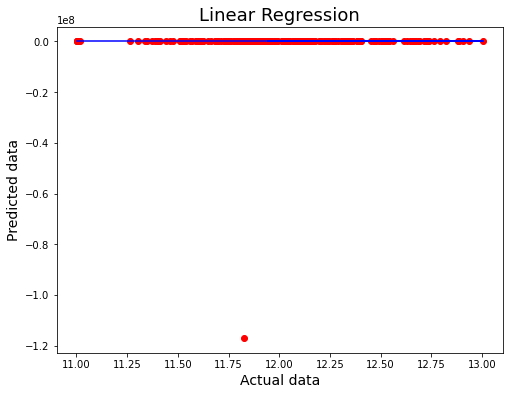

In [187]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_test, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [188]:
# Importing Libraries and Hyper parameter tuning: 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [190]:
#using ridge 

from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1,10],'random_state':list(range(0,10))}
ls = Ridge()
clf = GridSearchCV(ls,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [191]:
ls = Ridge(alpha=10,random_state=0)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)
print('ls score',ls.score(train_x,train_y))
pred_ls = ls.predict(test_x)

r2s = r2_score(test_y,pred_ls)
print('r2 score',r2s*100)

ls score 0.9410233186305986
r2 score 90.50425186674265


In [192]:
cv_score=cross_val_score(ls,x,y,cv=9)
cv_mean=cv_score.mean()
cv_mean

0.877069474127453

# 1. Decision Tree:

In [193]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto","sqrt", "log2"],
              'max_depth':[2,4,8,10,None],
            'min_samples_split':[0.25,0.5,1.0]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 0.25}


In [194]:
dt =DecisionTreeRegressor(criterion="mse",max_features="auto",max_depth=8,min_samples_split=0.25)
dt.fit(train_x,train_y)
dt.score(train_x,train_y)
predt = dt.predict(test_x)
print('dt score',dt.score(train_x,train_y))
dts = r2_score(test_y,predt)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=9)
dtc = dtscore.mean()
print('Cross Val Score:',dtc*100)
print("Mean squared error:",mean_squared_error(test_y,predt))
print("Mean absolute error:",mean_absolute_error(test_y,predt))

dt score 0.7283526006867136
R2 Score: 69.07639860005787
Cross Val Score: 64.9392829193274
Mean squared error: 0.047761833140350436
Mean absolute error: 0.1718335235892938


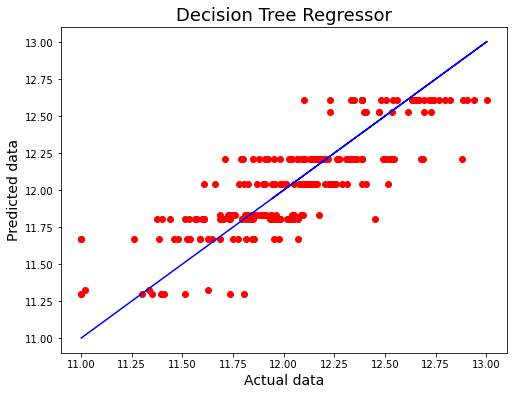

In [195]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predt, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

# 2. k-neighbors Regressor

In [202]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }
kn =KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}


In [203]:
kn =KNeighborsRegressor(n_neighbors=9,algorithm="ball_tree",weights='distance')
kn.fit(train_x,train_y)
kn.score(train_x,train_y)
predkn = kn.predict(test_x)
print('kn score',kn.score(train_x,train_y))
kns = r2_score(test_y,predkn)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=9)
knc = knscore.mean()
print('Cross Val Score:',knc*100)
print("Mean squared error:",mean_squared_error(test_y,predkn))
print("Mean absolute error:",mean_absolute_error(test_y,predkn))

kn score 1.0
R2 Score: 80.64102814538636
Cross Val Score: 74.4989983191624
Mean squared error: 0.029900139105095536
Mean absolute error: 0.13063864223199284


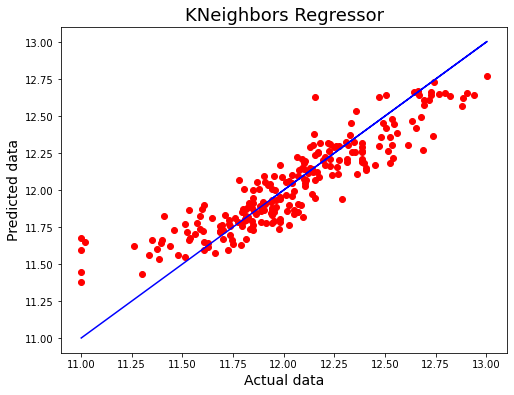

In [204]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predkn, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

# 3. SVR

In [212]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
svr =SVR()
parameters = [{'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}]
#grid_search = GridSearchCV(estimator = svr_gs, param_grid = parameters, 
                      #cv = 3, n_jobs = -1, verbose = 2)
clf = GridSearchCV(estimator = svr, param_grid = parameters, 
                      cv = 3, n_jobs = -1, verbose = 2)
clf.fit(train_x,train_y)

print(clf.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
{'C': 1, 'coef0': 10, 'degree': 8, 'gamma': 'auto', 'kernel': 'poly'}


In [213]:
svr =SVR(C=1,gamma='auto',kernel='poly',degree=8,coef0=10)
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
predsvr = svr.predict(test_x)
print('svr score',svr.score(train_x,train_y))
svrs = r2_score(test_y,predsvr)
print('R2 Score:',svrs*100)

svrscore = cross_val_score(svr,x,y,cv=9)
svrc = svrscore.mean()
print('Cross Val Score:',svrc*100)
print("Mean squared error:",mean_squared_error(test_y,predsvr))
print("Mean absolute error:",mean_absolute_error(test_y,predsvr))

svr score 0.9613342230844583
R2 Score: 90.24814060693546
Cross Val Score: 87.13226685914664
Mean squared error: 0.015061851144562318
Mean absolute error: 0.09102609857729914


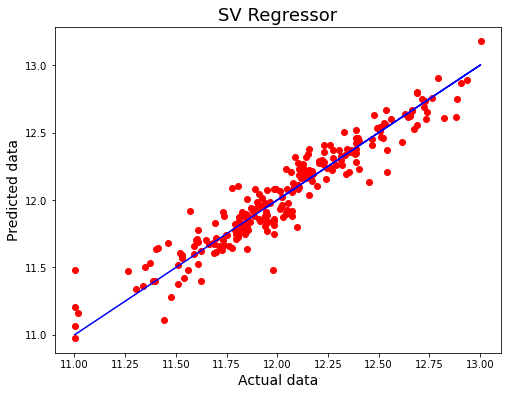

In [214]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predsvr, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('SV Regressor',fontsize=18)
plt.show()

# 4. Random forest regressor

In [206]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'bootstrap': [True, False], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters,cv = 9, n_jobs = -1, verbose = 2)
clf.fit(train_x,train_y)

print(clf.best_params_)

Fitting 9 folds for each of 240 candidates, totalling 2160 fits
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 13}


In [207]:
rf= RandomForestRegressor(criterion="mse",max_features="auto",max_depth=None,bootstrap=True,n_estimators=13)
rf.fit(train_x,train_y)
rf.score(train_x,train_y)
predrf = rf.predict(test_x)
print('rf score',rf.score(train_x,train_y))
rfs = r2_score(test_y,predrf)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=9)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)
print("Mean squared error:",mean_squared_error(test_y,predrf))
print("Mean absolute error:",mean_absolute_error(test_y,predrf))

rf score 0.9754355977056027
R2 Score: 88.50760703856633
Cross Val Score: 85.60935987955799
Mean squared error: 0.017750123858741758
Mean absolute error: 0.10063611344539777


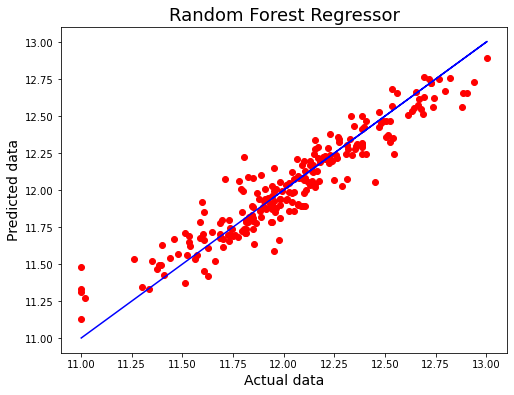

In [208]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predrf, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

Random Forest Regressor R2 Score and Cross validation score have very less difference as their values are 88.5% and 85.6% respectively so it is the best Model.

In [209]:
# Model Dumping

import pickle
filename = 'housing_price.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [210]:
loaded_model = pickle.load(open('housing_price.pkl','rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.8850760703856633


Random Forest Regressor Model is 88.5% accurate

In [211]:
import numpy as np
a=np.array(test_y)
predrf =np.array(rf.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": predrf},index=range(len(a)))
df_com

,original,predicted
0,11.002117,11.477794
1,12.560248,12.655488
2,12.154785,12.337450
3,12.075400,12.078988
4,11.982623,11.941008
...,...,...
229,12.716405,12.752552
230,11.982935,11.900506
231,11.699413,11.667131
232,12.052344,11.990190


Model is able to predict values approximately equal to the actual values